# **Churn Analysis**

In [41]:
# Load data manipulation package
import numpy as np
import pandas as pd

# Load data visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# import datetime package
import datetime as dt

# set display
pd.set_option("display.max_columns", None)

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, confusion_matrix

# Import Package
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix, classification_report

# 1. Business Understanding
---

## 1.1 Business Objective
----

- Determine the main reason of customer churn
- Determine non-churn customer's characteristics

## 1.2 Business Question
---

- What is the churn rate / customer retention rate?
- What are the possible marketing initiatives to prevent/reduce churn?

## 1.3 Analysis
---

- Data Exploration
- Cohort Analysis
- Retention and Revenue Analysis

# 2. Workflow
---

### 1. <font color='blue'> Importing Data to Python</font>
    * Data validation
### 2. <font color='blue'> Data Exploration</font>
    * Building customer cohort table, gaining insights, and business recommendation

# 3. Importing Data
---

In [42]:
data=pd.read_csv("telco_cust_churn.csv")

In [43]:
data.shape

(7043, 21)

In [44]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [45]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## 3.1 Data Description

The data set contains 7k rows and  columns. The following is the description of each column.

1. `CustomerID` (string): Mix of 4 digit numbers and 5 characters, unique to each customer.


2. `gender` (categorical): Female or Male.


3. `SeniorCitizen` (categorical): 0 means not senior citizen and 1 means senior citizen.


4. `Partner`(categorical): "Yes" for customer who has partner "No" for customer who don't have partner.


5. `Dependents` (categorical): "Yes" means customer have dependents and "No" means customers have no dependents.


6. `tenure` (numeric): How long customer has been customer


Column number 7-14 give information on which service each customer use

7. `PhoneService` (categorical): Whether customer use phone service or not


8. `MultipleLines` (categorical): "No Phone Service" means customer has multiple line but not using any phone service, "Yes" means multiple line with phone service, "No" means not fot both multiple line and phone service.  


8. `InternetService` (categorical): Consist of "DSL", "Fiber optic", and "No" for not using internet service.


9. `OnlineSecurity` (categorical): Consist of "Yes" for using security service, "No" for not using, and "No internet service" means not using online security due to not using internet service. 


10. `OnlineBackup` (categorical): Consist of "Yes" for using online backup service, "No" for not using, and "No internet service" means not using online backup service due to not using internet service. 


11. `DeviceProtection` (categorical): Consist of "Yes" for using device protection service, "No" for not using, and "No internet service" means not using device protection service due to not using internet service. 


12. `TechSupport` (categorical):Consist of "Yes" for using technical support service, "No" for not using, and "No internet service" means not using technical support service due to not using internet service. 


13. `StreamingTV` (categorical):Consist of "Yes" for using TV streaming service, "No" for not using, and "No internet service" means not using TV streaming service due to not using internet service. 


14. `StreamingMovies` (categorical):Consist of "Yes" for using movie streaming service, "No" for not using, and "No internet service" means not using movie streaming service due to not using internet service. 


15. `Contract` (categorical): There are 3 types of contract, "Month-to-month", "One year", and "Two year".


16. `PaperlessBilling` (categorical): "Yes" for only getting electronic bills, "No" for having a paper bill sent. 


17. `MonthlyCharges` (numerical): Total monthly for service (or s) usage.


18. `TotalCharges` (numerical): Total bills for the whole period using service (or s).


19. `Churn` (categorical): "No" for continuing using service after this month,"Yes" for no longer using service after this month.



Original Dataset: [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

In [46]:
data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [47]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [48]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [49]:
zero_charges = data["TotalCharges"].value_counts()[" "]
zero_charges

11

In [50]:
churn_data = data[data["TotalCharges"] != " "]

In [51]:
churn_data["TotalCharges"] = churn_data["TotalCharges"].astype(float)

C:\Users\Adinda Gita\AppData\Local\Temp\ipykernel_1660\854194176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_data["TotalCharges"] = churn_data["TotalCharges"].astype(float)


In [52]:
churn_data.shape

(7032, 21)

# 4. Exploratory Data Analysis
---

This data consist of a month data, and which customer churn at that specific month. The percentage calculation of that month Customer Churn is specified below:

In [53]:
churn = churn_data["Churn"].value_counts()["Yes"]
total_customer = churn_data["customerID"].value_counts().sum()
churn_percentage = (churn / total_customer) * 100
rounded_churn_percentage = round(churn_percentage, 2)
print(f"Churn percentage for this month is {rounded_churn_percentage}%")

Churn percentage for this month is 26.58%


<AxesSubplot:ylabel='customerID'>

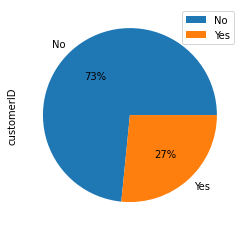

In [54]:
churn_data.groupby(["Churn"]).count().plot(kind='pie', y='customerID', autopct='%1.0f%%')

Above is the pie chart for total customer churn

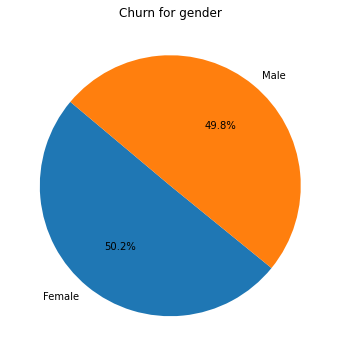

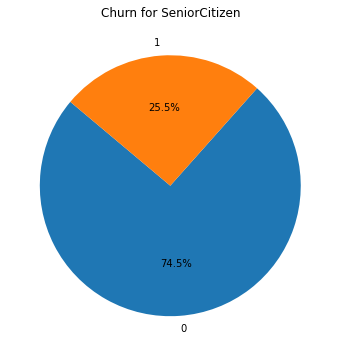

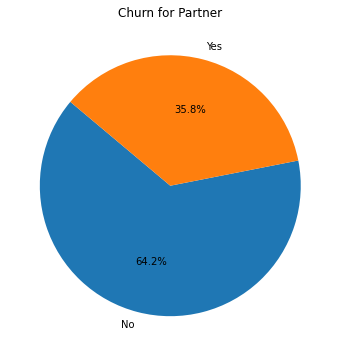

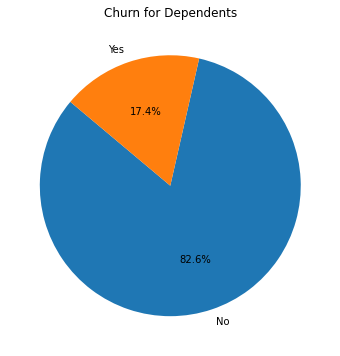

In [55]:
demography = ["gender", "SeniorCitizen", "Partner", "Dependents"]
for i in demography:
    each_group = churn_data.groupby("Churn")[i].value_counts(normalize=True)
    churn_percentage = each_group["Yes"] 
    plt.figure(figsize=(6, 6))
    plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Churn for {i}")

Above is the percentage comparison of each churn customer based on demographic data. 

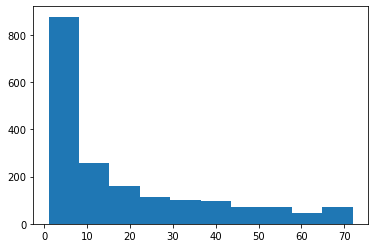

In [56]:
tenure_data=churn_data.loc[churn_data["Churn"] == "Yes", "tenure"]
tenure_data
plt.hist(tenure_data)
plt.show() 

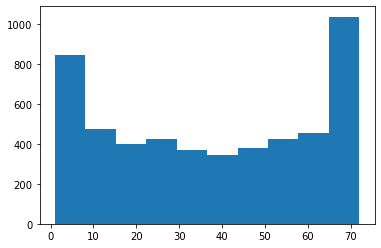

In [57]:
tenure_data=churn_data.loc[churn_data["Churn"] == "No", "tenure"]
tenure_data
plt.hist(tenure_data)
plt.show() 

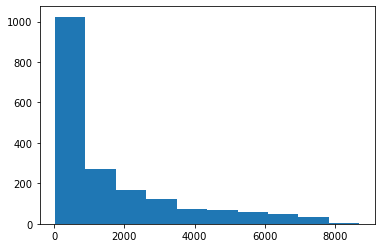

In [58]:
total_bill_data=churn_data.loc[churn_data["Churn"] == "Yes", "TotalCharges"]
plt.hist(total_bill_data)
plt.show() 

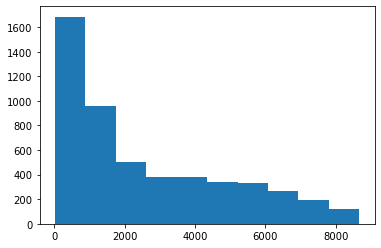

In [59]:
total_bill_data=churn_data.loc[churn_data["Churn"] == "No", "TotalCharges"]
plt.hist(total_bill_data)
plt.show() 

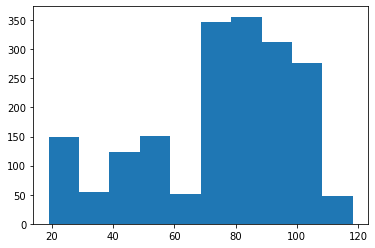

In [60]:
total_bill_data=churn_data.loc[churn_data["Churn"] == "Yes", "MonthlyCharges"]
plt.hist(total_bill_data)
plt.show() 

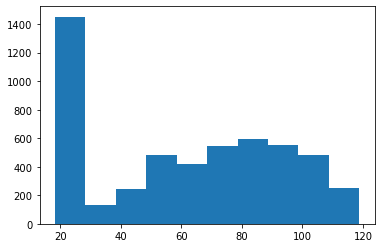

In [61]:
total_bill_data=churn_data.loc[churn_data["Churn"] == "No", "MonthlyCharges"]
plt.hist(total_bill_data)
plt.show() 

The difference between shurn and non-churn customer cannot be really seen for total charge. That could be because the tenure of the churn and non-churn customer is different. There are more of churn customer that has lower tenure. Hence their total charges are mostly in left side. But when comparing between monthly charge, difference could be seen. The total of customer churn are higher in the higher monthly charge. 

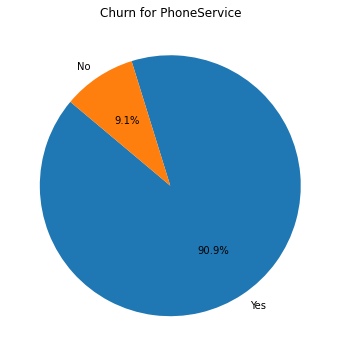

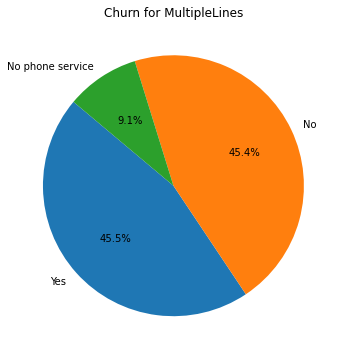

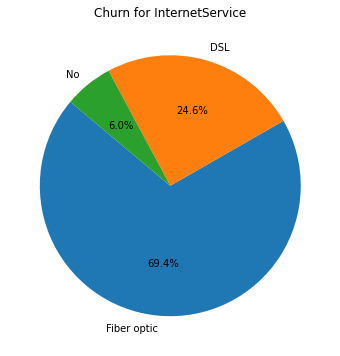

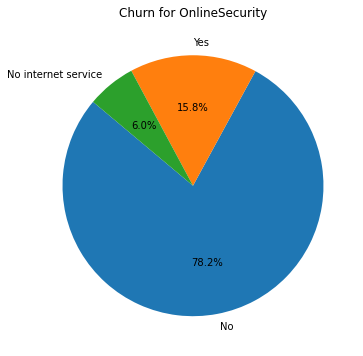

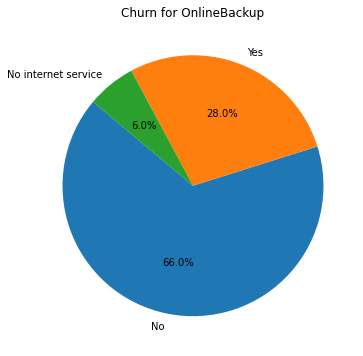

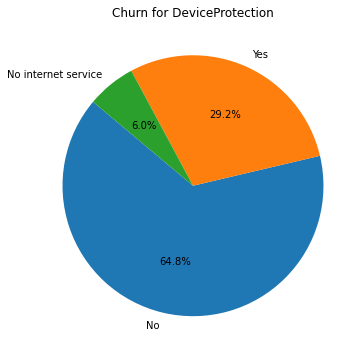

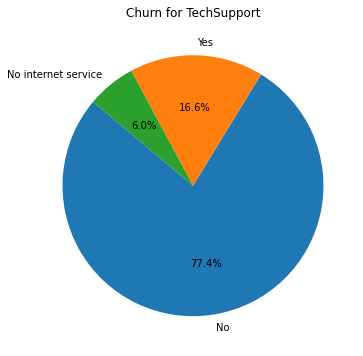

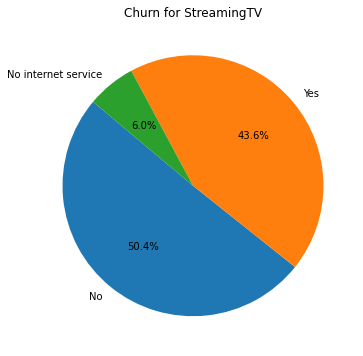

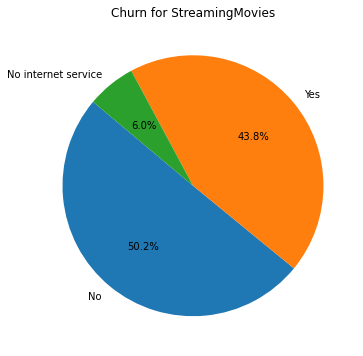

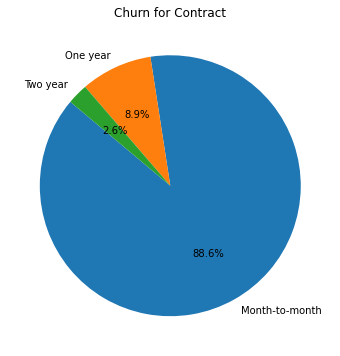

In [62]:
service_type = ["PhoneService", "MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract"]
for i in service_type:
    each_group = churn_data.groupby("Churn")[i].value_counts(normalize=True)
    churn_percentage = each_group["Yes"] 
    plt.figure(figsize=(6, 6))
    plt.pie(churn_percentage, labels=churn_percentage.index, autopct='%1.1f%%', startangle=140)
    plt.title(f"Churn for {i}")

Churn happen most in the user that also using phone service. However, for the one using only phone service churn percentage is not big. But there are a lot of those who also use phone service that use either DSL and Fiber Optic for internet service. Between DSL and Fiber optic, higher churn happened for those using fiber optic. 

In [63]:
churn_data.shape

(7032, 21)

In [64]:
columns_to_fit = ["InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport",
                  "gender", "SeniorCitizen", "Partner", "Dependents", "PhoneService", "MultipleLines",
                  "StreamingTV", "StreamingMovies", "Contract", "PaperlessBilling", "PaymentMethod", "Churn"]

enc = OneHotEncoder(handle_unknown='ignore',sparse=False).fit(churn_data.loc[:, columns_to_fit])
column_names = enc.get_feature_names(columns_to_fit)
encoded_variables = pd.DataFrame(enc.transform(churn_data.loc[:, columns_to_fit]), columns=column_names)
churn_data_df = churn_data.drop(columns_to_fit, 1)
churn_data.reset_index(drop=True, inplace=True)
one_hot_encoded_data = pd.concat([churn_data_df, encoded_variables], axis=1)
one_hot_encoded_data.reset_index(drop=True, inplace=True)
# Calculate the correlation matrix
correlation_matrix_yes = one_hot_encoded_data.corr()["Churn_Yes"]

C:\Users\Adinda Gita\AppData\Local\Temp\ipykernel_1660\2294854252.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  churn_data_df = churn_data.drop(columns_to_fit, 1)


In [65]:
one_hot_encoded_data

,customerID,tenure,MonthlyCharges,TotalCharges,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
0,7590-VHVEG,1.0,29.85,29.85,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,5575-GNVDE,34.0,56.95,1889.50,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,3668-QPYBK,2.0,53.85,108.15,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
3,7795-CFOCW,45.0,42.30,1840.75,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,9237-HQITU,2.0,70.70,151.65,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,NaN,NaN,NaN,NaN,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
7039,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7040,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
7041,NaN,NaN,NaN,NaN,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0


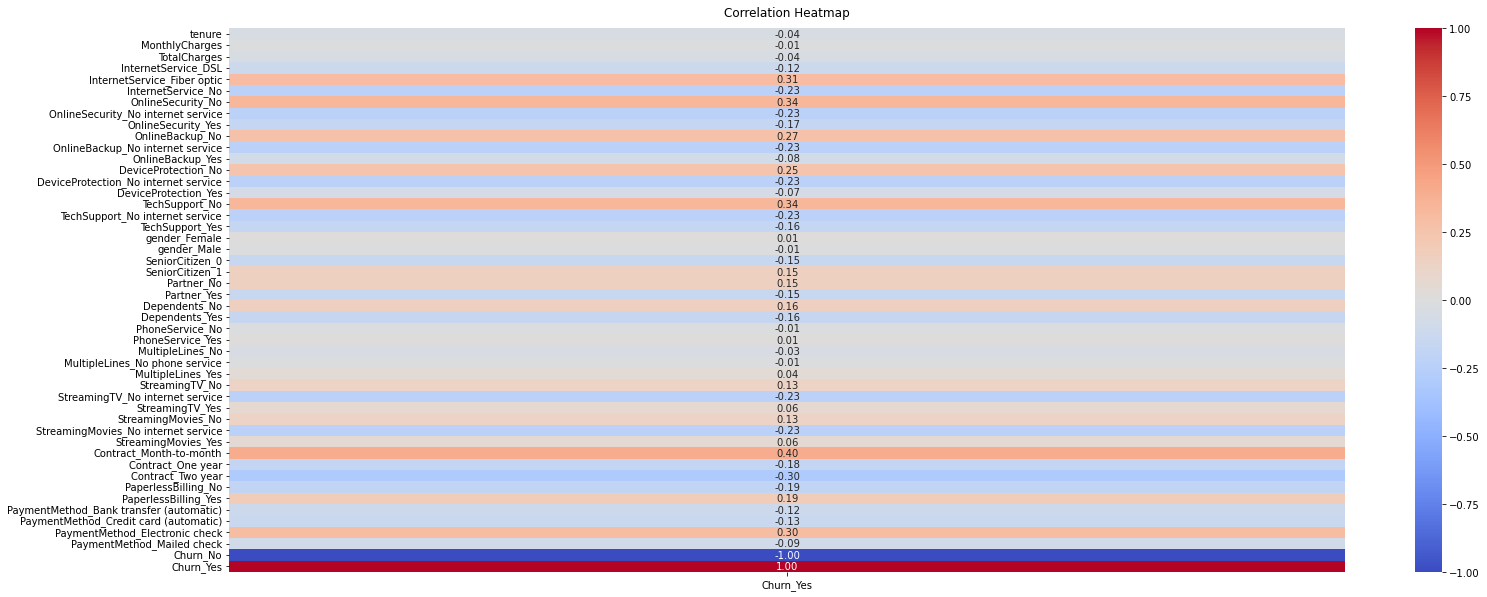

In [66]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix_yes.to_frame(), annot=True, fmt=".2f", cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

plt.show()

In [67]:
# Calculate the correlation matrix
correlation_matrix_no = one_hot_encoded_data.corr()["Churn_No"]

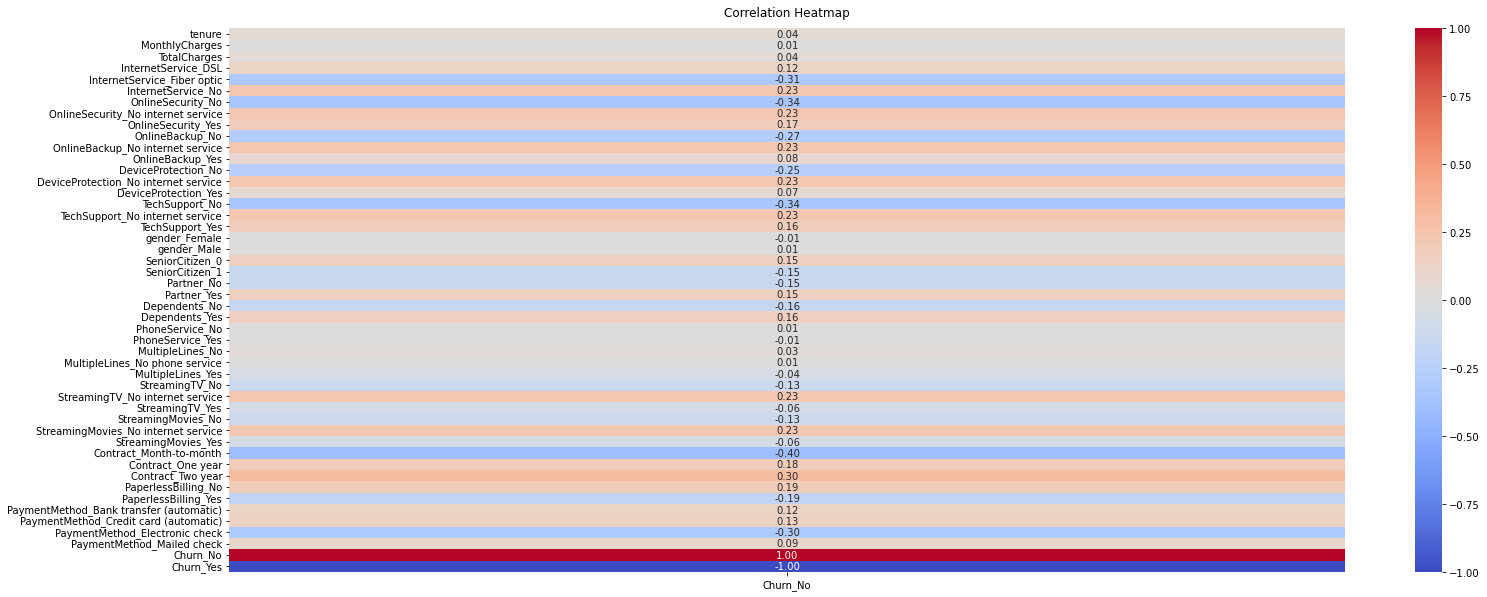

In [68]:
plt.figure(figsize=(25, 10))
heatmap = sns.heatmap(correlation_matrix_no.to_frame(), annot=True, fmt=".2f", cmap='coolwarm')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize': 12}, pad=12)

plt.show()

In [69]:
churn_correlation_threshold = 0.3  # Adjust the threshold as needed
filtered_correlations_yes = correlation_matrix_yes[abs(correlation_matrix_yes) > churn_correlation_threshold]

In [70]:
filtered_correlations_yes

InternetService_Fiber optic       0.307463
OnlineSecurity_No                 0.342235
TechSupport_No                    0.336877
Contract_Month-to-month           0.404565
Contract_Two year                -0.301552
PaymentMethod_Electronic check    0.301455
Churn_No                         -1.000000
Churn_Yes                         1.000000
Name: Churn_Yes, dtype: float64

In [71]:
filtered_correlations_no = correlation_matrix_no[abs(correlation_matrix_no) > churn_correlation_threshold]

In [72]:
filtered_correlations_no

InternetService_Fiber optic      -0.307463
OnlineSecurity_No                -0.342235
TechSupport_No                   -0.336877
Contract_Month-to-month          -0.404565
Contract_Two year                 0.301552
PaymentMethod_Electronic check   -0.301455
Churn_No                          1.000000
Churn_Yes                        -1.000000
Name: Churn_No, dtype: float64

In [73]:
one_hot_encoded_data.shape

(7043, 49)

# 5. Model
---

## 5.1 Data pre processing for testing and training
----

In [74]:
columns_tf_model = ["gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines",
                  "InternetService","OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport",
                  "StreamingTV","StreamingMovies","Contract","PaperlessBilling","PaymentMethod"]

enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
encoded_variables_model = enc.fit_transform(churn_data[columns_tf_model])
column_names_model = enc.get_feature_names(columns_tf_model)

encoded_variables_df_model = pd.DataFrame(encoded_variables_model, columns=column_names_model)
enc_data_model = churn_data.drop(columns=columns_tf_model, axis=1)
ohe_data_model = pd.concat([enc_data_model, encoded_variables_df_model], axis=1)

In [75]:
# Assuming 'target_column' is the name of your target column
target_column = 'Churn'  # Replace with the actual target column name

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target column
ohe_data_model["Churn"] = label_encoder.fit_transform(ohe_data_model["Churn"])

# Print the mapping of classes to encoded values
print("Class Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Class Mapping: {'No': 0, 'Yes': 1}


In [76]:
ohe_data_model

,customerID,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,29.85,29.85,0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,5575-GNVDE,34,56.95,1889.50,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3668-QPYBK,2,53.85,108.15,1,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,7795-CFOCW,45,42.30,1840.75,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,9237-HQITU,2,70.70,151.65,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,24,84.80,1990.50,0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7028,2234-XADUH,72,103.20,7362.90,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7029,4801-JZAZL,11,29.60,346.45,0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
7030,8361-LTMKD,4,74.40,306.60,1,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [77]:
ohe_data_model.isnull().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecu

In [78]:
ohe_data_model.isna().sum()

customerID                                 0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecu

In [79]:
one_hot_encoded_data.isnull().sum()

customerID                                 11
tenure                                     11
MonthlyCharges                             11
TotalCharges                               11
InternetService_DSL                        11
InternetService_Fiber optic                11
InternetService_No                         11
OnlineSecurity_No                          11
OnlineSecurity_No internet service         11
OnlineSecurity_Yes                         11
OnlineBackup_No                            11
OnlineBackup_No internet service           11
OnlineBackup_Yes                           11
DeviceProtection_No                        11
DeviceProtection_No internet service       11
DeviceProtection_Yes                       11
TechSupport_No                             11
TechSupport_No internet service            11
TechSupport_Yes                            11
gender_Female                              11
gender_Male                                11
SeniorCitizen_0                   

In [80]:
def split_input_output(data, column_to_drop, target_column):
    """
    Function to split input (x) and output (y)

    Parameters
    ----------
    data: pandas dataframe
          dataframe input

    target_column: string
          output column name

    Return
    ------

    x: pandas dataframe
          input data

    y: pandas dataframe
          output data

    """
    data_raw = data.drop(columns = column_to_drop)
    X = data_raw.drop(columns = target_column)
    y = data[target_column]

    return X, y

In [81]:
X, y = split_input_output(ohe_data_model,"customerID","Churn")

In [82]:
X.isna().sum()

tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
gender_Female                              0
gender_Male                                0
SeniorCitizen_0                            0
SeniorCitizen_1                            0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecurity_Yes                         0
OnlineBack

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## 5.2 Model
----

In [84]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5758,65,59.80,3808.20,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
5352,4,20.40,84.75,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5736,61,24.20,1445.20,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
6056,59,25.00,1510.50,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
229,47,85.30,4107.25,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,3,50.40,137.25,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5191,51,111.50,5703.25,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5226,9,81.15,784.45,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5390,50,19.75,989.05,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


In [85]:
def cross_validation(model, _X, _y, _cv=5):
      '''Function to perform 5 Folds Cross-Validation
       Parameters
       ----------
      model: Python Class, default=None
              This is the machine learning algorithm to be used for training.
      _X: array
           This is the matrix of features.
      _y: array
           This is the target variable.
      _cv: int, default=5
          Determines the number of folds for cross-validation.
       Returns
       -------
       The function returns a dictionary containing the metrics 'accuracy', 'precision',
       'recall', 'f1' for both training set and validation set.
      '''
      _scoring = ['accuracy', 'precision', 'recall', 'f1']
      results = cross_validate(estimator=model,
                               X=_X,
                               y=_y,
                               cv=_cv,
                               scoring=_scoring,
                               return_train_score=True)
      
      return {"Training Accuracy scores": results['train_accuracy'],
              "Mean Training Accuracy": results['train_accuracy'].mean()*100,
              "Training Precision scores": results['train_precision'],
              "Mean Training Precision": results['train_precision'].mean(),
              "Training Recall scores": results['train_recall'],
              "Mean Training Recall": results['train_recall'].mean(),
              "Training F1 scores": results['train_f1'],
              "Mean Training F1 Score": results['train_f1'].mean(),
              "Validation Accuracy scores": results['test_accuracy'],
              "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
              "Validation Precision scores": results['test_precision'],
              "Mean Validation Precision": results['test_precision'].mean(),
              "Validation Recall scores": results['test_recall'],
              "Mean Validation Recall": results['test_recall'].mean(),
              "Validation F1 scores": results['test_f1'],
              "Mean Validation F1 Score": results['test_f1'].mean()
              }

In [86]:
def plot_result(x_label, y_label, plot_title, train_data, val_data):
        '''Function to plot a grouped bar chart showing the training and validation
          results of the ML model in each fold after applying K-fold cross-validation.
         Parameters
         ----------
         x_label: str, 
            Name of the algorithm used for training e.g 'Decision Tree'
          
         y_label: str, 
            Name of metric being visualized e.g 'Accuracy'
         plot_title: str, 
            This is the title of the plot e.g 'Accuracy Plot'
         
         train_result: list, array
            This is the list containing either training precision, accuracy, or f1 score.
        
         val_result: list, array
            This is the list containing either validation precision, accuracy, or f1 score.
         Returns
         -------
         The function returns a Grouped Barchart showing the training and validation result
         in each fold.
        '''
        
        # Set size of plot
        plt.figure(figsize=(12,6))
        labels = ["1st Fold", "2nd Fold", "3rd Fold", "4th Fold", "5th Fold"]
        X_axis = np.arange(len(labels))
        ax = plt.gca()
        plt.ylim(0.40000, 1)
        plt.bar(X_axis-0.2, train_data, 0.4, color='blue', label='Training')
        plt.bar(X_axis+0.2, val_data, 0.4, color='red', label='Validation')
        plt.title(plot_title, fontsize=30)
        plt.xticks(X_axis, labels)
        plt.xlabel(x_label, fontsize=14)
        plt.ylabel(y_label, fontsize=14)
        plt.legend()
        plt.grid(True)
        plt.show()

The code for the `plot_result` function was adapted from the work of <b>[Iniabasi Affiah]</b> in [https://www.section.io/engineering-education/how-to-implement-k-fold-cross-validation/].

#### Logistic Regression
----

In [87]:
lr_clf = LogisticRegression(penalty = "none",
                            max_iter = 10000).fit(X_train, y_train)

In [88]:
lr_clf.score(X_train, y_train)

0.8023774145616642

In [89]:
coefficients = lr_clf.coef_[0]

# Print the coefficients
for feature, coefficient in zip(X.columns, coefficients):
    if coefficient > 0.05:
        print(f"{feature}: {coefficient}")

Dependents_No: 0.06896517200281085
PhoneService_No: 0.10061968345836729
MultipleLines_No phone service: 0.10061968345836729
InternetService_Fiber optic: 0.3419326310728536
OnlineSecurity_No: 0.2009256661183604
TechSupport_No: 0.16593378583416366
StreamingTV_Yes: 0.07036108803716912
StreamingMovies_Yes: 0.07029501594743752
Contract_Month-to-month: 0.673537055804441
PaymentMethod_Electronic check: 0.18069340303374037


In [98]:
logistic_regression_result = cross_validation(lr_clf, X_train, y_train, 5)
print(logistic_regression_result)

{'Training Accuracy scores': array([0.80228238, 0.81082515, 0.80498806, 0.80366145, 0.79994694]), 'Mean Training Accuracy': 80.43407950319936, 'Training Precision scores': array([0.65232558, 0.67580453, 0.65704388, 0.65614035, 0.64864865]), 'Mean Training Precision': 0.6579925980060485, 'Training Recall scores': array([0.5571003 , 0.5625    , 0.56504469, 0.5571003 , 0.54816286]), 'Mean Training Recall': 0.5579816285998014, 'Training F1 scores': array([0.60096411, 0.6139686 , 0.60758142, 0.60257787, 0.5941873 ]), 'Mean Training F1 Score': 0.6038558605766722, 'Validation Accuracy scores': array([0.81018028, 0.78343949, 0.79830149, 0.80467091, 0.8163482 ]), 'Mean Validation Accuracy': 80.25880721282981, 'Validation Precision scores': array([0.67980296, 0.61032864, 0.63963964, 0.65740741, 0.69082126]), 'Mean Validation Precision': 0.6555999794496743, 'Validation Recall scores': array([0.54761905, 0.51792829, 0.56349206, 0.56349206, 0.56746032]), 'Mean Validation Recall': 0.5519983557832162

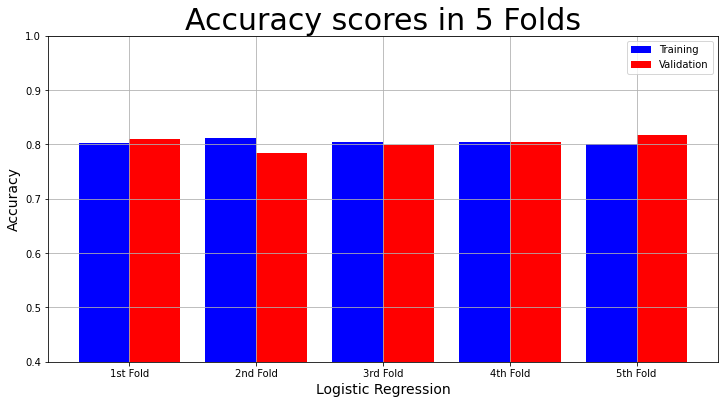

In [102]:
plot_result("Logistic Regression",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            logistic_regression_result["Training Accuracy scores"],
            logistic_regression_result["Validation Accuracy scores"])

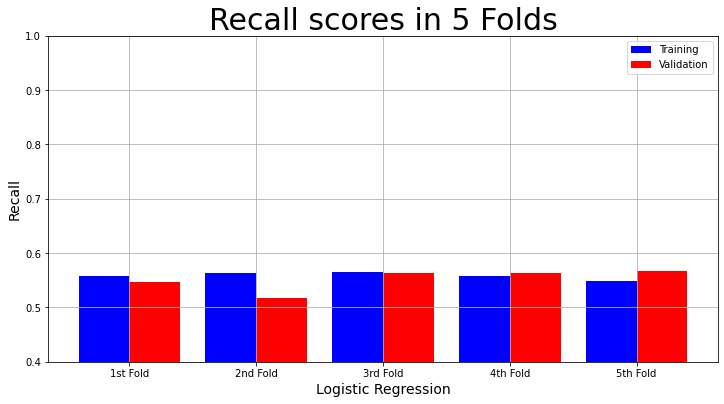

In [99]:
plot_result("Logistic Regression",
            "Recall",
            "Recall scores in 5 Folds",
            logistic_regression_result["Training Recall scores"],
            logistic_regression_result["Validation Recall scores"])

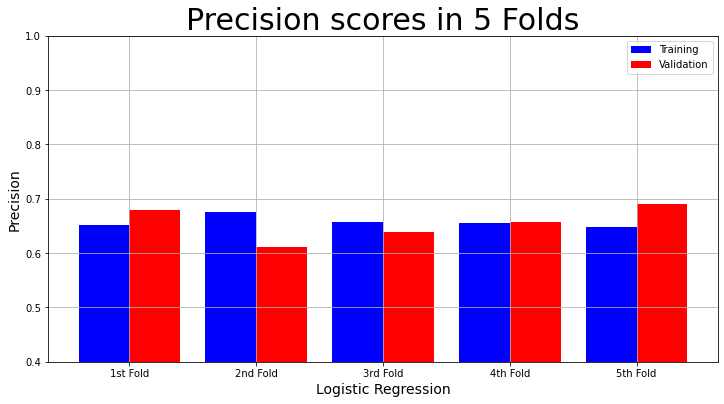

In [100]:
# Plot Precision Result
plot_result("Logistic Regression",
            "Precision",
            "Precision scores in 5 Folds",
            logistic_regression_result["Training Precision scores"],
            logistic_regression_result["Validation Precision scores"])

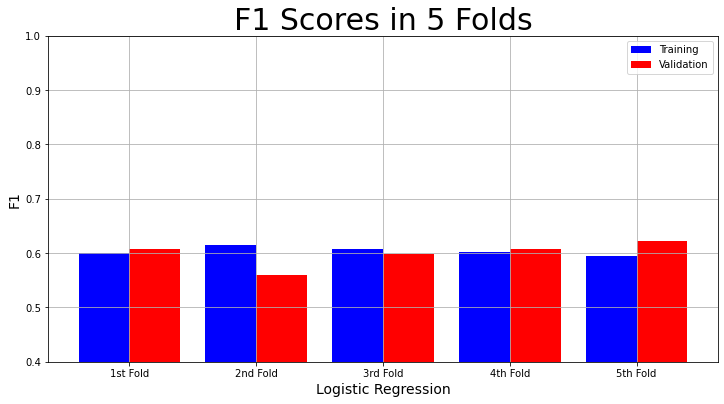

In [101]:
plot_result("Logistic Regression",
            "F1",
            "F1 Scores in 5 Folds",
            logistic_regression_result["Training F1 scores"],
            logistic_regression_result["Validation F1 scores"])

#### Decision Tree
----

In [93]:
clf_dt = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [94]:
max_depths = [3, 5, 7, 10,15,20]
for depth in max_depths:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)
    
    # Evaluate on validation data
    val_score = dt_model.score(X_test, y_test)
    print(f"Max Depth: {depth}, Validation Score: {val_score}")

Max Depth: 3, Validation Score: 0.7897457992244722
Max Depth: 5, Validation Score: 0.7862990090478242
Max Depth: 7, Validation Score: 0.7858681602757432
Max Depth: 10, Validation Score: 0.7673416630762603
Max Depth: 15, Validation Score: 0.7259801809564843
Max Depth: 20, Validation Score: 0.7358897027143473


In [95]:
clf_dt_score = clf_dt.score(X_train, y_train)

In [96]:
clf_dt_score

0.791339418382509

In [97]:
feature_importances = clf_dt.feature_importances_
feature_names = X_train.columns.tolist()

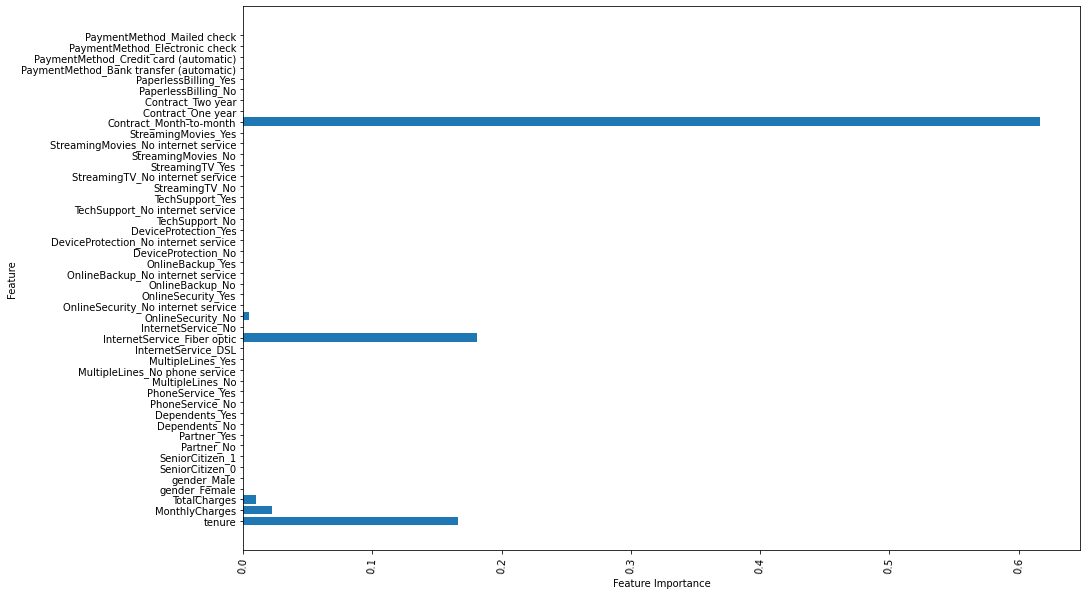

In [53]:
plt.figure(figsize=(15,10))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), feature_names)
plt.xticks(rotation = 85)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [35]:
decision_tree_result = cross_validation(clf_dt, X_train, y_train, 5)


NameError: name 'cross_validation' is not defined

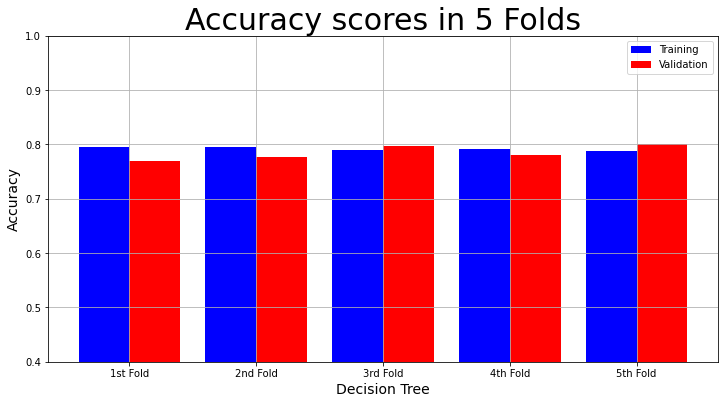

In [57]:
plot_result("Decision Tree",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            decision_tree_result["Training Accuracy scores"],
            decision_tree_result["Validation Accuracy scores"])

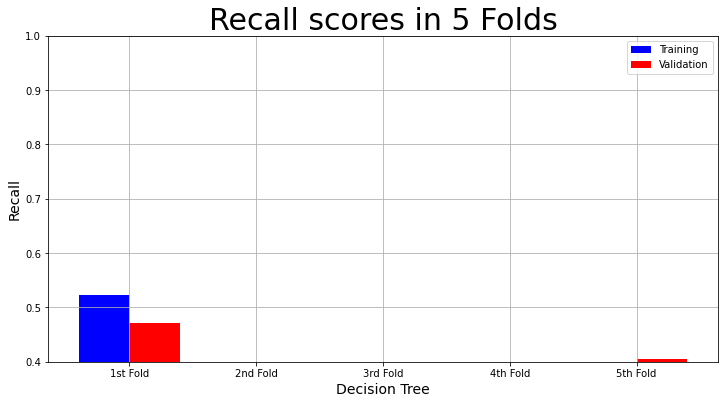

In [58]:
plot_result("Decision Tree",
            "Recall",
            "Recall scores in 5 Folds",
            decision_tree_result["Training Recall scores"],
            decision_tree_result["Validation Recall scores"])

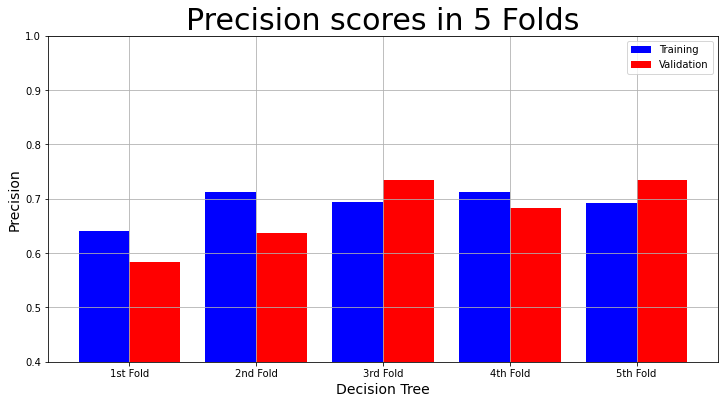

In [59]:
# Plot Precision Result
plot_result("Decision Tree",
            "Precision",
            "Precision scores in 5 Folds",
            decision_tree_result["Training Precision scores"],
            decision_tree_result["Validation Precision scores"])

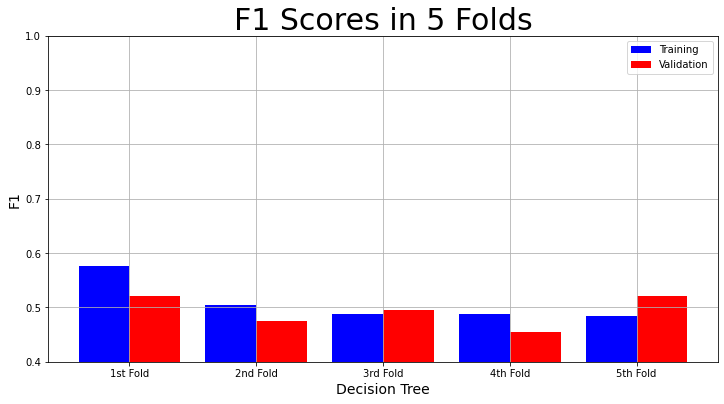

In [60]:
plot_result("Decision Tree",
            "F1",
            "F1 Scores in 5 Folds",
            decision_tree_result["Training F1 scores"],
            decision_tree_result["Validation F1 scores"])

In [61]:
clf_rf = RandomForestClassifier(max_depth=5, random_state=0)

In [62]:
max_depths = [3, 5, 7, 10,15,20]
for depth in max_depths:
    clf_rf = RandomForestClassifier(max_depth=depth, random_state=42)
    clf_rf.fit(X_train, y_train)
    
    # Evaluate on validation data
    val_score = clf_rf.score(X_test, y_test)
    print(f"Max Depth: {depth}, Validation Score: {val_score}")

Max Depth: 3, Validation Score: 0.7871607065919862
Max Depth: 5, Validation Score: 0.7949159844894442
Max Depth: 7, Validation Score: 0.7983627746660922
Max Depth: 10, Validation Score: 0.8009478672985783
Max Depth: 15, Validation Score: 0.7875915553640672
Max Depth: 20, Validation Score: 0.7824213700990952


#### Random Forest
----

In [63]:
clf_rf = RandomForestClassifier(max_depth=10, random_state=42)
clf_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

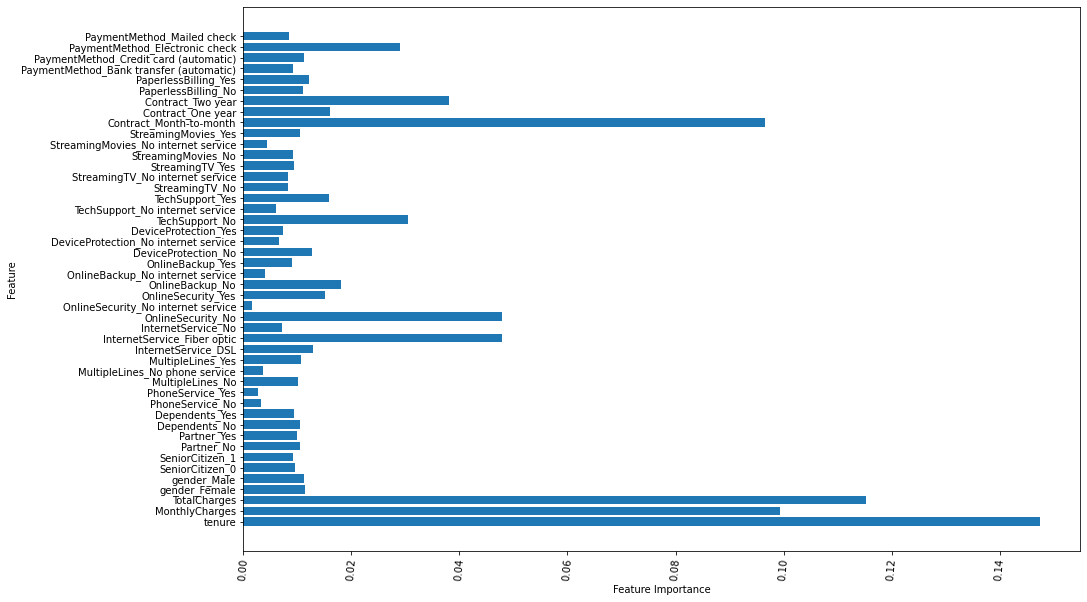

In [66]:
plt.figure(figsize=(15,10))
plt.barh(range(len(feature_importances)), feature_importances)
plt.yticks(range(len(feature_importances)), feature_names)
plt.xticks(rotation = 85)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [64]:
random_forest_result = cross_validation(clf_rf, X_train, y_train, 5)

{'Training Accuracy scores': array([0.8970276 , 0.9015654 , 0.90183072, 0.89705492, 0.8944017 ]), 'Mean Training Accuracy': 89.83760693871504, 'Training Precision scores': array([0.85290764, 0.84210526, 0.84961581, 0.85371429, 0.8372093 ]), 'Mean Training Precision': 0.8471104595368398, 'Training Recall scores': array([0.7428004 , 0.77777778, 0.76861966, 0.74180735, 0.75074479]), 'Mean Training Recall': 0.756349994483063, 'Training F1 scores': array([0.7940552 , 0.80866426, 0.80709072, 0.79383634, 0.79162304]), 'Mean Training F1 Score': 0.7990539124179129, 'Validation Accuracy scores': array([0.8038176 , 0.77494692, 0.80785563, 0.79936306, 0.82271762]), 'Mean Validation Accuracy': 80.17401661139291, 'Validation Precision scores': array([0.67357513, 0.59330144, 0.67149758, 0.66153846, 0.70731707]), 'Mean Validation Precision': 0.6614459368381267, 'Validation Recall scores': array([0.51587302, 0.4940239 , 0.5515873 , 0.51190476, 0.57539683]), 'Mean Validation Recall': 0.529757161828875, 

In [65]:
feature_importances = clf_rf.feature_importances_
feature_names = X_train.columns.tolist()

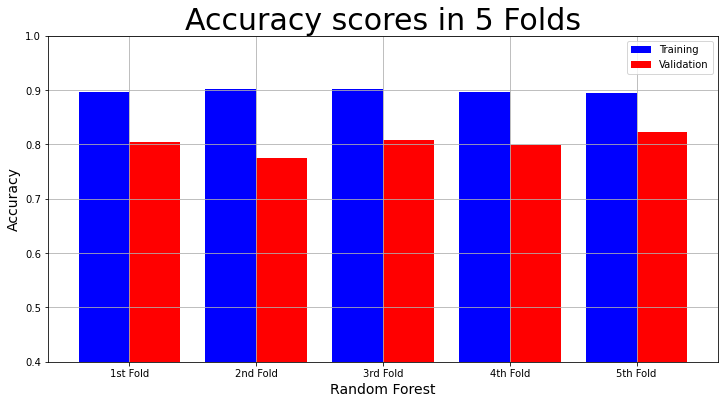

In [67]:
plot_result("Random Forest",
            "Accuracy",
            "Accuracy scores in 5 Folds",
            random_forest_result["Training Accuracy scores"],
            random_forest_result["Validation Accuracy scores"])

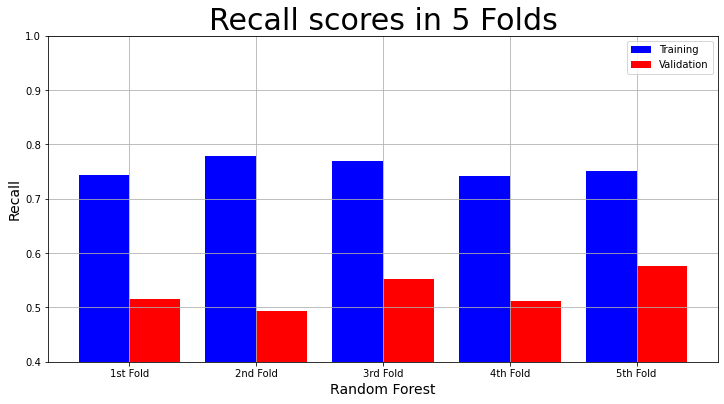

In [68]:
plot_result("Random Forest",
            "Recall",
            "Recall scores in 5 Folds",
            random_forest_result["Training Recall scores"],
            random_forest_result["Validation Recall scores"])

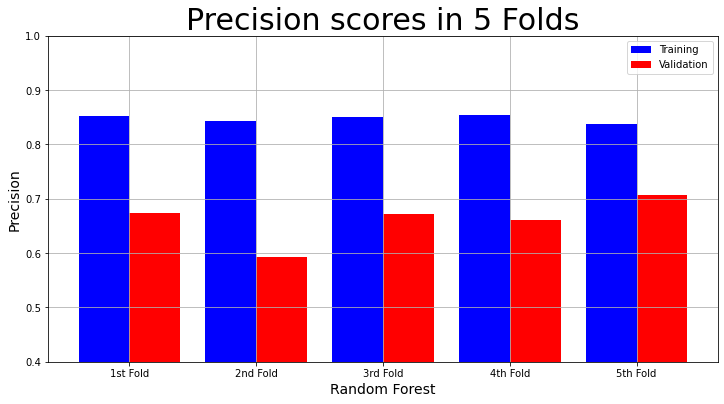

In [69]:
# Plot Precision Result
plot_result("Random Forest",
            "Precision",
            "Precision scores in 5 Folds",
            random_forest_result["Training Precision scores"],
            random_forest_result["Validation Precision scores"])

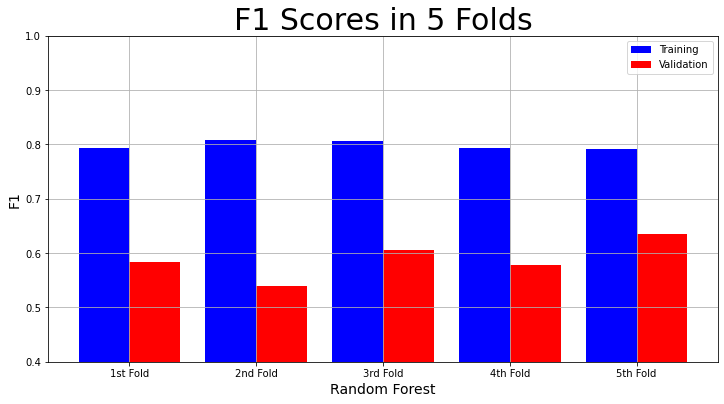

In [70]:
plot_result("Random Forest",
            "F1",
            "F1 Scores in 5 Folds",
            random_forest_result["Training F1 scores"],
            random_forest_result["Validation F1 scores"])

In [77]:
# List of dictionaries
data = [decision_tree_result,random_forest_result,logistic_regression_result]
mta = [d['Mean Training Accuracy'] for d in data]
mtp = [d['Mean Training Precision'] for d in data]
mtr = [d['Mean Training Recall'] for d in data]
mtf1 = [d['Mean Training F1 Score'] for d in data]
mva = [d['Mean Validation Accuracy'] for d in data]
mvp = [d['Mean Validation Precision'] for d in data]
mvr = [d['Mean Validation Recall'] for d in data]
mvf1 = [d['Mean Validation F1 Score'] for d in data]

# Create a DataFrame with "Name" column
mean_score = pd.DataFrame({'Model':['Decision Tree','Random Forest','Logistic Regression'],'Mean Training Accuracy': mta,
                           'Mean Training Precision': mtp,'Mean Training Recall': mtr,'Mean Training F1 Score': mtf1,
                           'Mean Validation Accuracy': mva,'Mean Validation Precision': mvp,
                           'Mean Validation Recall': mvr,'Mean Validation F1 Score': mvf1})

# Print the DataFrame
mean_score


,Model,Mean Training Accuracy,Mean Training Precision,Mean Training Recall,Mean Training F1 Score,Mean Validation Accuracy,Mean Validation Precision,Mean Validation Recall,Mean Validation F1 Score
0,Decision Tree,79.171103,0.690513,0.407072,0.508515,78.497477,0.674329,0.393951,0.493686
1,Random Forest,89.837607,0.847110,0.756350,0.799054,80.174017,0.661446,0.529757,0.588164
2,Logistic Regression,80.434080,0.657993,0.557982,0.603856,80.258807,0.655600,0.551998,0.599205


Text(0.5, 1.0, 'Confusion Matrix')

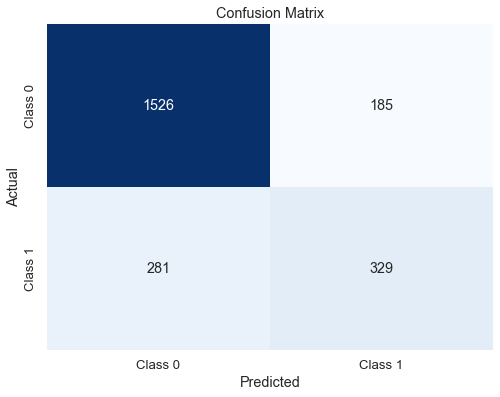

In [96]:
lr_cm = confusion_matrix(y_test, lr_prediction)
class_labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(lr_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

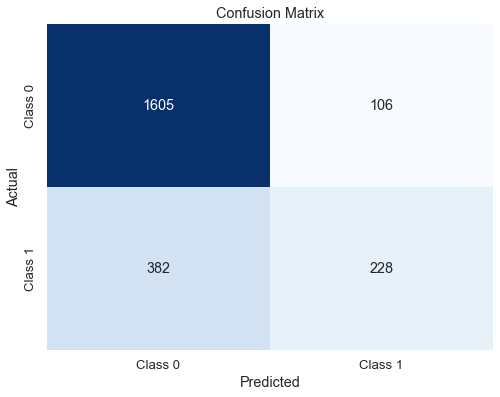

In [97]:
dt_prediction = clf_dt.predict(X_test)
dt_cm = confusion_matrix(y_test, dt_prediction)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

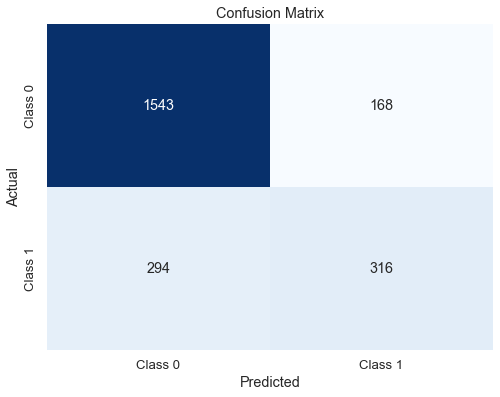

In [98]:
rf_prediction = clf_rf.predict(X_test)
rf_cm = confusion_matrix(y_test, rf_prediction)
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels, cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')